# **Criação de uma carteira simples**

# 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 6.4 MB 22.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importando dados

Criação de cesta de ativos que podem ser usados na construção das carteiras

* <b> Fundos imobiliários:</b> MXRF11, XPLG11 e HCTR11

* <b>Ações:</b> BPAN4, VALE3, WEGE3,TOTS3, JHSF3, PRIO3, OIBR3, PETR4, SUZB3, JBSS3, BPAC11, MGLU3, LREN3

* <b>ETFs:</b>
SMAL11, IVVB11

* <b>BDRs:</b>
COCA34, AAPL34, TSLA34, MSBR34, MSFT34, AMZON34

Vamos transformar isso numa lista

In [ ]:
ativos = ['MXRF11', 'XPLG11', 'HCTR11','BPAN4', 'VALE3', 'WEGE3' ,'TOTS3', 'JHSF3' ,'PRIO3', 'OIBR3', 'PETR4' ,'SUZB3' ,'JBSS3',
'BPAC11', 'LREN3', 'SMAL11', 'IVVB11', 'COCA34' ,'AAPL34','TSLA34','MSBR34' ,'MSFT34','AMZO34']

In [ ]:
ativos = [i + '.SA' for i in ativos]

In [ ]:
inicio = '2020-06-01'
fim = '2022-03-10'

In [ ]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  23 of 23 completed


In [ ]:
precos.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,42.799931,84.636940,12.160340,5.749840,40.569160,117.809998,177.149994,19.508410,4.476348,39.875954,...,0.80,16.523731,6.258,96.830002,37.996574,20.113430,30.191750,41.981915,20.620480,NaN
2020-06-02,41.642643,82.057327,13.414207,6.650648,38.952755,118.599998,173.500000,19.375154,4.737106,40.984974,...,0.83,17.393400,6.718,101.050003,37.966923,20.418474,29.000000,41.981915,20.747644,NaN
2020-06-03,40.923050,80.342674,14.430400,8.049776,38.978203,119.019997,171.300003,18.300240,4.937020,42.979252,...,0.82,17.450294,6.496,105.199997,37.680347,21.136810,28.100000,42.170525,20.835682,NaN
2020-06-04,40.685654,80.509422,14.612294,8.586428,38.854118,119.320000,171.979996,19.073111,5.206470,43.348927,...,0.83,17.417784,6.784,105.029999,39.380062,21.343458,27.674999,43.742298,21.422602,115.610001
2020-06-05,40.554596,78.917198,14.609870,8.615176,39.041851,120.000000,170.899994,18.611166,5.258622,44.730339,...,0.84,17.962343,7.454,107.790001,37.848339,20.428314,27.599751,42.917114,21.681826,117.360001


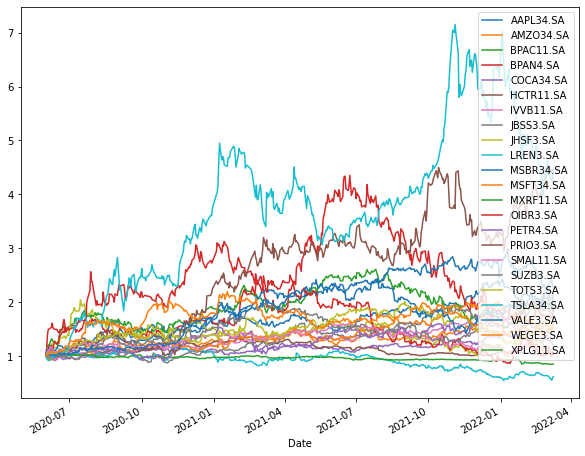

In [ ]:
(precos/precos.iloc[0]).plot(figsize = (10,8));

In [ ]:
precos = precos.dropna()

# 3. Criação da carteira fictícia

Criação de um dicionário que determina as alocações

In [ ]:
precos.columns

Index(['AAPL34.SA', 'AMZO34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA',
       'HCTR11.SA', 'IVVB11.SA', 'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA',
       'MSBR34.SA', 'MSFT34.SA', 'MXRF11.SA', 'OIBR3.SA', 'PETR4.SA',
       'PRIO3.SA', 'SMAL11.SA', 'SUZB3.SA', 'TOTS3.SA', 'TSLA34.SA',
       'VALE3.SA', 'WEGE3.SA', 'XPLG11.SA'],
      dtype='object')

In [ ]:
compras = {
    'AAPL34.SA':14000,
    'BPAC11.SA':8000,
    'COCA34.SA':6000,
    'HCTR11.SA':4000,
    'IVVB11.SA':9000,
    'MSBR34.SA':4000,
    'OIBR3.SA':3000,
    'PETR4.SA':17000,
    'SMAL11.SA': 20000,
    'WEGE3.SA':15000

}

Verificando se o valor estipulado da carteira está correto

In [ ]:
sum(compras.values())

100000

Preço dos ativos no primeiro dia de investimento

In [ ]:
primeiro = precos.iloc[0]

Transformando dicionário de alocações em dataframe

In [ ]:
list(compras.keys())

['AAPL34.SA',
 'BPAC11.SA',
 'COCA34.SA',
 'HCTR11.SA',
 'IVVB11.SA',
 'MSBR34.SA',
 'OIBR3.SA',
 'PETR4.SA',
 'SMAL11.SA',
 'WEGE3.SA']

In [ ]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

In [ ]:
qtd_acoes = round(qtd_acoes,0)

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,OIBR3.SA,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,NaN,7992.924926,NaN,5983.534225,4056.879990,8942.959778,NaN,NaN,NaN,...,2999.619940,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN
2020-06-05,13950.781006,NaN,7991.598866,NaN,6012.445061,4080.000000,8886.799683,NaN,NaN,NaN,...,3035.759905,17531.246979,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN
2020-06-08,13796.811401,NaN,8758.388247,NaN,5941.392540,4079.659927,8788.000000,NaN,NaN,NaN,...,3108.040052,17872.354034,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.561829,NaN
2020-06-09,14244.255219,NaN,8700.017639,NaN,5840.450470,4065.720062,8795.799683,NaN,NaN,NaN,...,3324.880060,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN
2020-06-10,14769.112946,NaN,8405.506224,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,3288.740095,16975.958588,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.244400,NaN


In [ ]:
PL['PL Total'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,LREN3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,13995.864868,NaN,7992.924926,NaN,5983.534225,4056.879990,8942.959778,NaN,NaN,NaN,...,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN,99912.632169
2020-06-05,13950.781006,NaN,7991.598866,NaN,6012.445061,4080.000000,8886.799683,NaN,NaN,NaN,...,17531.246979,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN,101333.038368
2020-06-08,13796.811401,NaN,8758.388247,NaN,5941.392540,4079.659927,8788.000000,NaN,NaN,NaN,...,17872.354034,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.561829,NaN,103607.231483
2020-06-09,14244.255219,NaN,8700.017639,NaN,5840.450470,4065.720062,8795.799683,NaN,NaN,NaN,...,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN,103054.636400
2020-06-10,14769.112946,NaN,8405.506224,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,NaN,...,16975.958588,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.244400,NaN,102133.705677


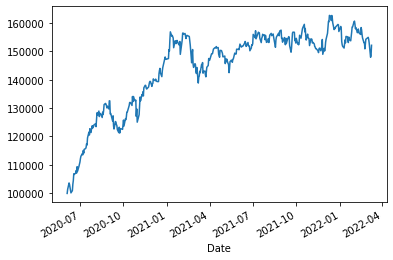

In [ ]:
PL['PL Total'].plot();

# 4. Comparando nossa carteira com o Ibov

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [ ]:
ibov.head()

,IBOV
Date,
2020-06-01,88620.0
2020-06-02,91046.0
2020-06-03,93002.0
2020-06-04,93829.0
2020-06-05,94637.0


In [ ]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [ ]:
consolidado.head()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,93829.0,13995.864868,NaN,7992.924926,NaN,5983.534225,4056.879990,8942.959778,NaN,NaN,...,16999.756927,NaN,19955.699768,NaN,NaN,NaN,NaN,14995.821190,NaN,99912.632169
2020-06-05,94637.0,13950.781006,NaN,7991.598866,NaN,6012.445061,4080.000000,8886.799683,NaN,NaN,...,17531.246979,NaN,20480.100174,NaN,NaN,NaN,NaN,15177.277946,NaN,101333.038368
2020-06-08,97645.0,13796.811401,NaN,8758.388247,NaN,5941.392540,4079.659927,8788.000000,NaN,NaN,...,17872.354034,NaN,21466.200638,NaN,NaN,NaN,NaN,15680.561829,NaN,103607.231483
2020-06-09,96747.0,14244.255219,NaN,8700.017639,NaN,5840.450470,4065.720062,8795.799683,NaN,NaN,...,17229.804443,NaN,21053.899536,NaN,NaN,NaN,NaN,15683.986473,NaN,103054.636400
2020-06-10,94686.0,14769.112946,NaN,8405.506224,NaN,5880.141258,4079.659927,8866.519714,NaN,NaN,...,16975.958588,NaN,20348.999710,NaN,NaN,NaN,NaN,15403.244400,NaN,102133.705677


Normalizando os dados para ajustar a escala

In [ ]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [ ]:
consolidado_adj.tail()

,IBOV,AAPL34.SA,AMZO34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,HCTR11.SA,IVVB11.SA,JBSS3.SA,JHSF3.SA,...,PETR4.SA,PRIO3.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,XPLG11.SA,PL Total
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,1.227403,2.042243,NaN,1.688304,NaN,1.330079,1.032937,1.392022,NaN,NaN,...,1.965807,NaN,1.066362,NaN,NaN,NaN,NaN,1.458740,NaN,1.544055
2022-03-04,1.220028,2.022334,NaN,1.630134,NaN,1.341316,1.029165,1.390278,NaN,NaN,...,1.965233,NaN,1.053985,NaN,NaN,NaN,NaN,1.470876,NaN,1.531610
2022-03-07,1.189323,1.988907,NaN,1.574017,NaN,1.322928,1.024891,1.360623,NaN,NaN,...,1.825720,NaN,1.009235,NaN,NaN,NaN,NaN,1.450804,NaN,1.480695
2022-03-08,1.185167,1.954989,NaN,1.632872,NaN,1.262144,1.025562,1.339691,NaN,NaN,...,1.863612,NaN,1.021042,NaN,NaN,NaN,NaN,1.473677,NaN,1.488093
2022-03-09,1.213910,2.015207,NaN,1.710888,NaN,1.251418,1.010141,1.360623,NaN,NaN,...,1.869354,NaN,1.057793,NaN,NaN,NaN,NaN,1.525025,NaN,1.523109


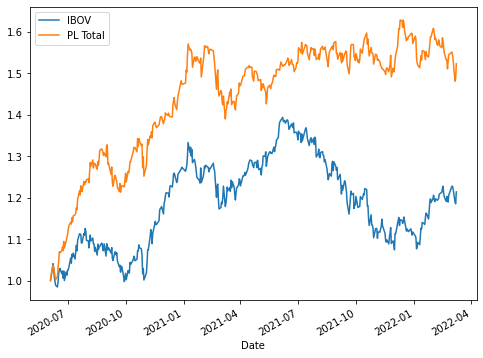

In [ ]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6))

# 5. Comparação com outros benchmarks

## 5.1. Dólar

In [ ]:
dolar = yf.download('USDBRL=X', start = inicio, end = fim)

dolar.rename(columns={'Adj Close': 'Dólar'}, inplace = True)

dolar.drop(dolar.columns[[0,1,2,3,5]], axis = 1, inplace = True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dolar.head()

,Dólar
Date,
2020-06-01,5.3348
2020-06-02,5.3665
2020-06-03,5.1993
2020-06-04,5.0616
2020-06-05,5.1172


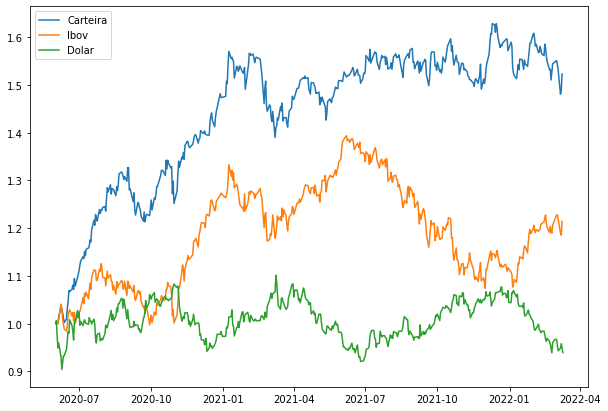

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(consolidado_adj['IBOV'])

plt.plot(dolar/dolar.iloc[0])

nomes = ['Carteira', 'Ibov', 'Dolar']

plt.legend(nomes);

plt.show()

## 5.2. S&P 500

In [ ]:
sp = yf.download('SPY', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


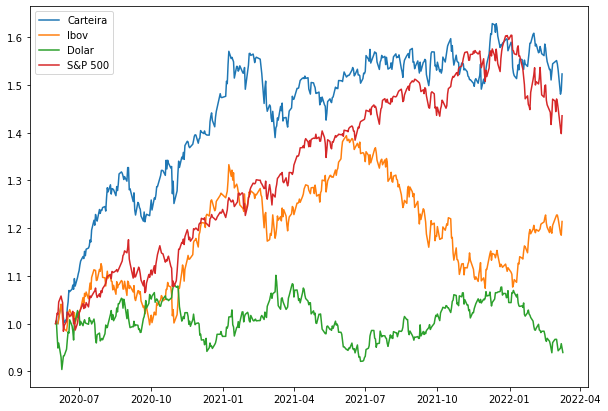

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)

plt.plot(consolidado_adj['PL Total'])

plt.plot(consolidado_adj['IBOV'])

plt.plot(dolar/dolar.iloc[0])

plt.plot(sp/sp.iloc[0])

nomes = ['Carteira', 'Ibov', 'Dolar', 'S&P 500']

plt.legend(nomes);

plt.show()